# Advertisement Click Classification: A Comprehensive Machine Learning Case Study in Python

### Logic of the Code

1. **Data Preprocessing and Exploratory Data Analysis (EDA)**:
   - **Data Loading and Cleaning**:
     - Load the dataset and remove duplicate values.
     - Drop irrelevant columns (e.g., `VistID`, `Country_Name`, and `Year`).
   - **Data Exploration**:
     - Use methods like `head()`, `info()`, `describe()`, and `nunique()` to inspect the dataset.
     - Visualize the distribution of target and feature variables using bar charts and histograms.
   - **Feature Selection**:
     - Use ANOVA tests and Chi-square tests to select features correlated with the target variable.
     - Finalize a set of continuous and categorical variables as predictors.

2. **Feature Engineering and Data Preparation**:
   - **Feature Transformation**:
     - Convert binary categorical variables (e.g., `Male`) into numerical values (0/1).
     - Use `pd.get_dummies()` to convert nominal categorical variables into dummy variables.
   - **Data Normalization**:
     - Normalize continuous variables using `MinMaxScaler`.
   - **Data Splitting**:
     - Split the dataset into training and testing sets (70% training, 30% testing).

3. **Machine Learning Modeling and Evaluation**:
   - **Model Training**:
     - Train models using various machine learning algorithms (Logistic Regression, Decision Tree, Random Forest, AdaBoost, SVM, Naive Bayes).
   - **Model Evaluation**:
     - Evaluate model performance on the test set using classification reports, confusion matrices, and weighted F1 scores.
     - Perform 10-fold cross-validation to assess model stability.
   - **Feature Importance**:
     - Plot feature importance for models that support it (e.g., Decision Tree, Random Forest, AdaBoost).

4. **Model Deployment**:
   - **Select the Best Model**:
     - Choose AdaBoost as the final model based on performance.
   - **Save the Model**:
     - Save the model as a `.pkl` file using `pickle`.
   - **Create Prediction Function**:
     - Define a function `PredictClickStatus` to take input data and return predictions.
   - **Deploy API**:
     - Use Flask to create a REST API, allowing predictions via HTTP requests.

---

### Machine Learning Algorithms Used and Their Pros and Cons

1. **Logistic Regression**:
   - **Pros**:
     - Simple and easy to use, suitable for linearly separable data.
     - Computationally efficient, works well with large datasets.
     - Outputs probabilities, making it interpretable.
   - **Cons**:
     - Limited ability to model non-linear relationships.
     - Sensitive to multicollinearity among features.

2. **Decision Tree**:
   - **Pros**:
     - Easy to understand and interpret; can be visualized.
     - No need for feature scaling or normalization.
     - Handles non-linear relationships well.
   - **Cons**:
     - Prone to overfitting, especially with deep trees.
     - Sensitive to noise in the data.

3. **Random Forest**:
   - **Pros**:
     - Reduces overfitting by combining multiple decision trees.
     - Handles high-dimensional data and missing values well.
     - Provides feature importance scores.
   - **Cons**:
     - Training can be slow, especially with many trees.
     - Complex model, harder to interpret.

4. **AdaBoost**:
   - **Pros**:
     - Improves performance by combining multiple weak classifiers (e.g., shallow decision trees).
     - Robust to noise in the data.
     - Handles non-linear relationships well.
   - **Cons**:
     - Sensitive to outliers.
     - Training can be slow with many weak classifiers.

5. **Support Vector Machine (SVM)**:
   - **Pros**:
     - Effective in high-dimensional spaces, suitable for small datasets.
     - Can handle non-linear relationships using kernel functions.
   - **Cons**:
     - Training is slow for large datasets.
     - Sensitive to hyperparameters like `C` and `gamma`.

6. **Naive Bayes**:
   - **Pros**:
     - Simple and efficient, works well with high-dimensional sparse data (e.g., text classification).
     - Performs well with small datasets.
   - **Cons**:
     - Assumes feature independence, which is often unrealistic.
     - Limited ability to handle continuous variables.

---

### Summary

- **Logic**:
  1. Data preprocessing and exploratory analysis.
  2. Feature engineering and data preparation.
  3. Train and evaluate multiple machine learning algorithms, then select the best model for deployment.
- **Algorithms Used**:
  - A total of 6 machine learning algorithms were used: Logistic Regression, Decision Tree, Random Forest, AdaBoost, SVM, and Naive Bayes.
- **Best Model**:
  - AdaBoost was chosen as the final model for deployment due to its performance and feature importance capabilities.

In [1]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
import pandas as pd
import numpy as np

AdClickData=pd.read_csv("/Users/Ad click data.csv", encoding='latin')
print('Shape before deleting duplicate values:', AdClickData.shape)

# Removing duplicate rows if any
AdClickData=AdClickData.drop_duplicates()
print('Shape after deleting duplicate values:', AdClickData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
AdClickData.head(10)


Shape before deleting duplicate values: (6657, 14)
Shape after deleting duplicate values: (6657, 14)


,VistID,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,Country_Name,City_code,Male,Time_Period,Weekday,Month,Year,Clicked
0,5183153,87.97,43,55901.12,185.46,product_11,Serbia,City_5,No,Mid-Night,Thursday,July,2020,0
1,4023265,51.63,50,39132.00,176.73,product_8,Turkmenistan,City_1,No,Evening,Saturday,June,2020,1
2,4708083,82.37,38,57032.36,210.60,product_6,Northern Mariana Islands,City_2,No,Morning,Tuesday,January,2020,0
3,9771815,62.06,45,48868.00,190.05,product_19,South Africa,City_3,Yes,Morning,Thursday,April,2020,1
4,6451317,77.66,31,61608.23,204.86,product_11,Guadeloupe,City_2,No,Noon,Thursday,January,2020,0
5,1475237,35.98,38,60813.00,125.20,product_10,Guernsey,City_2,Yes,Early-Morning,Saturday,July,2020,1
6,5578680,52.70,26,49283.00,140.83,product_1,Anguilla,City_2,Yes,Early-Morning,Tuesday,January,2020,1
7,4037672,82.58,23,61601.05,183.42,product_8,Switzerland,City_4,No,Noon,Sunday,July,2020,0
8,5792642,70.96,22,69874.18,198.72,product_29,Niue,City_3,No,Mid-Night,Tuesday,April,2020,0
9,9377192,56.91,50,21773.22,146.44,product_18,Norfolk Island,City_4,No,Early-Morning,Friday,April,2020,1


# Defining the problem statement:
Create a Predictive model which can tell whether a logged in user will click on a given product advertisement or not?
Target Variable: Clicked
Predictors: Time_Spent, Age, Avg_Income, Internet_Usage, Ad_Topic... etc.
Clicked=1 means the ad was clicked.
Clicked=0 means the ad was NOT clicked.
Determining the type of Machine Learning
Based on the problem statement you can understand that we need to create a supervised ML classification model, as the target variable is categorical.

# Looking at the distribution of Target variable
If target variable's distribution is too skewed then the predictive modeling will not be possible.
Bell curve is desirable but slightly positive skew or negative skew is also fine
When performing Classification, make sure there is a balance in the the distribution of each class otherwise it impacts the Machine Learning algorithms ability to learn all the classes

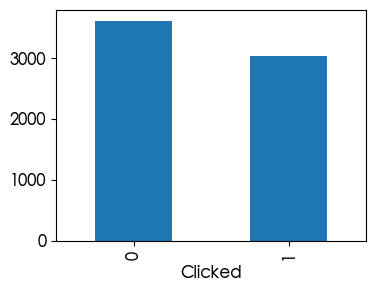

In [3]:
# Creating Bar chart as the Target variable is Categorical
GroupedData=AdClickData.groupby('Clicked').size()
GroupedData.plot(kind='bar', figsize=(4,3));

The Target variable distribution looks balanced. There are enough number of rows for Clicked=0 as well Clicked=1 for the ML algorithms to learn. Hence we can go ahead!



# Basic Data Exploration
This step is performed to guage the overall data. The volume of data, the types of columns present in the data. Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.

This step helps to start the column rejection process. You must look at each column carefully and ask, does this column affect the values of the Target variable? For example in this case study, you will ask, Does this column affect the click or no-click of the advertisement? If the answer is a clear "No" the remove the column immediately from the data otherwise keep the column for further analysis.

In this data "VistID", "Country_Name" and "Year" are such columns which are useless to us because it does not affect the click or no-click for an advertisement. Hence, we will remove "VistID", "Country_Name" and "Year" from the data.

There are four commands which are used for Basic data exploration in Python

head() : This helps to see a few sample rows of the data
info() : This provides the summarized information of the data
describe() : This provides the descriptive statistical details of the data
nunique(): This helps us to identify if a column is categorical or continuous

In [4]:
# Looking at sample rows in the data
AdClickData.head()

,VistID,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,Country_Name,City_code,Male,Time_Period,Weekday,Month,Year,Clicked
0,5183153,87.97,43,55901.12,185.46,product_11,Serbia,City_5,No,Mid-Night,Thursday,July,2020,0
1,4023265,51.63,50,39132.00,176.73,product_8,Turkmenistan,City_1,No,Evening,Saturday,June,2020,1
2,4708083,82.37,38,57032.36,210.60,product_6,Northern Mariana Islands,City_2,No,Morning,Tuesday,January,2020,0
3,9771815,62.06,45,48868.00,190.05,product_19,South Africa,City_3,Yes,Morning,Thursday,April,2020,1
4,6451317,77.66,31,61608.23,204.86,product_11,Guadeloupe,City_2,No,Noon,Thursday,January,2020,0


In [5]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
AdClickData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6657 entries, 0 to 6656
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   VistID          6657 non-null   int64  
 1   Time_Spent      6657 non-null   float64
 2   Age             6657 non-null   int64  
 3   Avg_Income      6657 non-null   float64
 4   Internet_Usage  6657 non-null   float64
 5   Ad_Topic        6657 non-null   object 
 6   Country_Name    6657 non-null   object 
 7   City_code       6657 non-null   object 
 8   Male            6657 non-null   object 
 9   Time_Period     6657 non-null   object 
 10  Weekday         6657 non-null   object 
 11  Month           6657 non-null   object 
 12  Year            6657 non-null   int64  
 13  Clicked         6657 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 728.2+ KB


In [6]:
# Looking at the descriptive statistics of the data
AdClickData.describe(include='all')

,VistID,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,Country_Name,City_code,Male,Time_Period,Weekday,Month,Year,Clicked
count,6.657000e+03,6657.000000,6657.000000,6657.000000,6657.000000,6657,6657,6657,6657,6657,6657,6657,6657.0,6657.000000
unique,NaN,NaN,NaN,NaN,NaN,30,237,9,2,6,7,7,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,product_22,Canada,City_1,No,Evening,Friday,January,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,266,46,2559,3571,1266,986,988,NaN,NaN
mean,5.542115e+06,66.849548,37.258825,55930.486743,184.947684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,0.456362
std,2.596284e+06,15.509672,10.995458,13110.339257,43.189896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.498129
min,1.000187e+06,32.600000,19.000000,13996.500000,104.780000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,0.000000
25%,3.307428e+06,55.200000,28.000000,48454.000000,145.730000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,0.000000
50%,5.523907e+06,70.660000,36.000000,58183.000000,193.580000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,0.000000
75%,7.823942e+06,79.570000,46.000000,65957.000000,222.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,1.000000


In [7]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is 
# likely to be a category otherwise continuous
AdClickData.nunique()

VistID            6657
Time_Spent         900
Age                 43
Avg_Income        1487
Internet_Usage     966
Ad_Topic            30
Country_Name       237
City_code            9
Male                 2
Time_Period          6
Weekday              7
Month                7
Year                 1
Clicked              2
dtype: int64

# Basic Data Exploration Results
Based on the basic exploration above, you can now create a simple report of the data, noting down your observations regaring each column. Hence, creating a initial roadmap for further analysis.

The selected columns in this step are not final, further study will be done and then a final list will be created

VistID: Qualitative. Rejected. This column does not affect the ad click
Time_Spent: Continuous. Selected.
Age: Continuous. Selected.
Area_Income: Continuous. Selected.
Internet_Usage: Continuous. Selected.
Ad_Topic: Categorical. Selected.
Country_Name: Qualitative. Rejected. This column has very high cardinality
City_Code: Categorical. Selected.
Male: Categorical. Selected.
Time_Period: Categorical. Selected.
Weekday: Categorical. Selected.
Month: Categorical. Selected.
Year: Qualitative. Rejected. This column does not affect the ad click.
Clicked: Categorical. Selected. This is the Target Variable!

## Removing useless variables from data
Based on the above report, removing "VistID", "Country_Name" and "Year" columns from the data

In [8]:
# Deleting those columns which are not useful in predictive analysis 
# because these variables are qualitative
UselessColumns = ["VistID", "Country_Name" , "Year"]
AdClickData = AdClickData.drop(UselessColumns,axis=1)
AdClickData.head()

,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,City_code,Male,Time_Period,Weekday,Month,Clicked
0,87.97,43,55901.12,185.46,product_11,City_5,No,Mid-Night,Thursday,July,0
1,51.63,50,39132.00,176.73,product_8,City_1,No,Evening,Saturday,June,1
2,82.37,38,57032.36,210.60,product_6,City_2,No,Morning,Tuesday,January,0
3,62.06,45,48868.00,190.05,product_19,City_3,Yes,Morning,Thursday,April,1
4,77.66,31,61608.23,204.86,product_11,City_2,No,Noon,Thursday,January,0


# Visual Exploratory Data Analysis
Categorical variables: Bar plot
Continuous variables: Histogram
Visualize distribution of all the Categorical Predictor variables in the data using bar plots
We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.

Based on the Basic Data Exploration above, we have spotted six categorical predictors in the data

Categorical Predictors: "Ad_Topic", "City_code", "Male" ,"Time_Period", "Weekday", "Month"

We use bar charts to see how the data is distributed for these categorical columns.

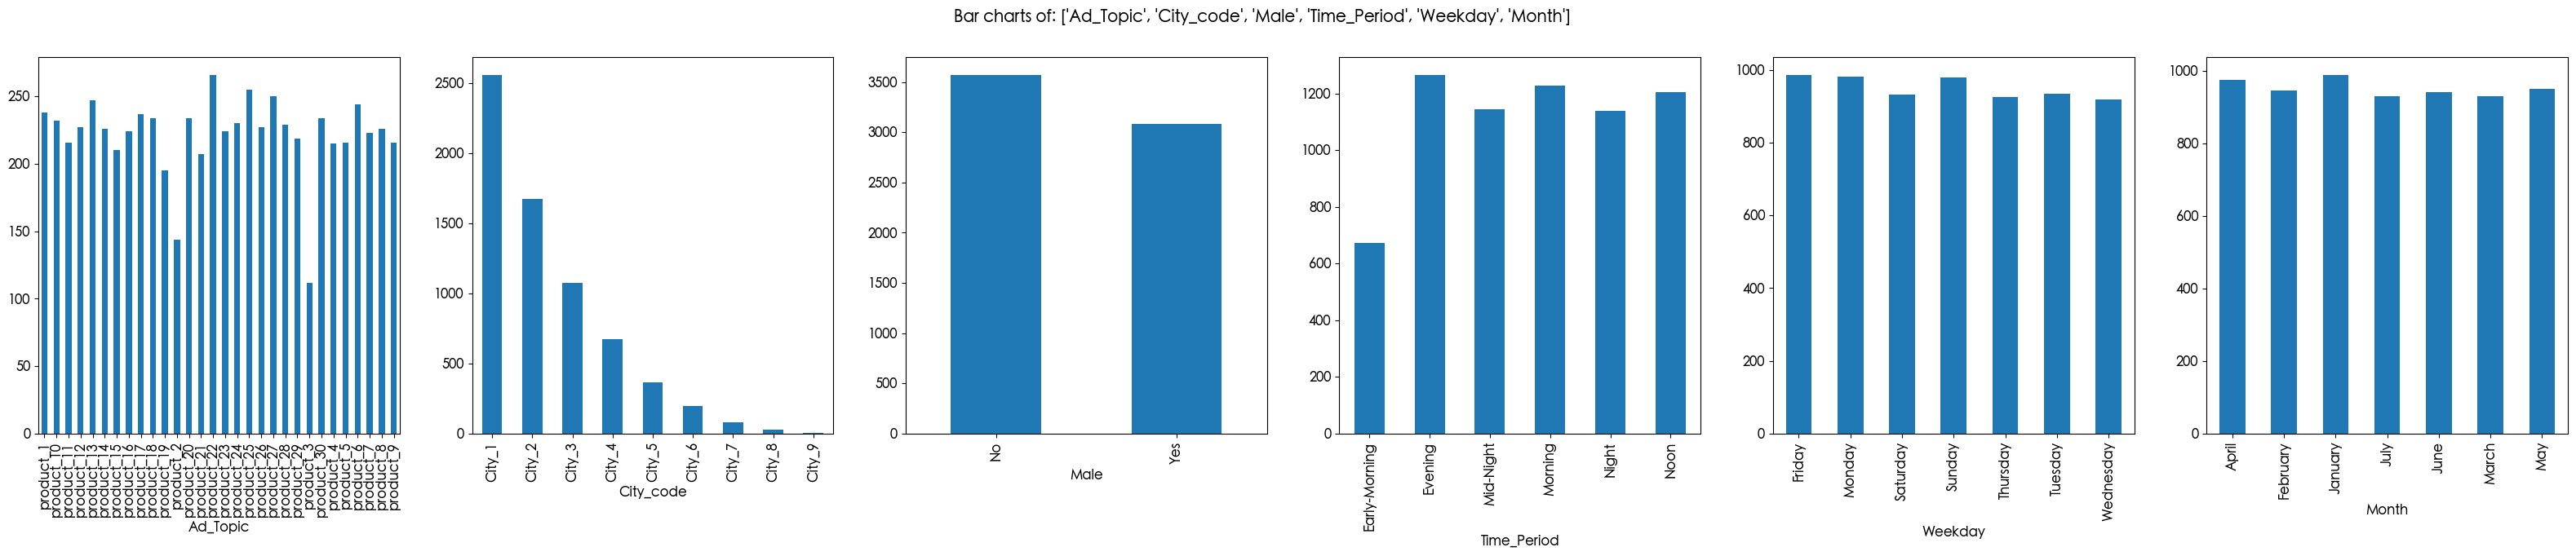

In [9]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for 
# multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    #%matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(40,6))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

#####################################################################
# Calling the function
PlotBarCharts(inpData=AdClickData, colsToPlot=["Ad_Topic","City_code", "Male",
                                               "Time_Period", "Weekday","Month"])

# Bar Charts Interpretation
These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

The ideal bar chart looks like the chart of "Weekday" and "Month" column. Where each category has comparable frequency. Hence, there are enough rows for each category in the data for the ML algorithm to learn.

If there is a column which shows too skewed distribution where there is only one dominant bar and the other categories are present in very low numbers. These kind of columns may not be very helpful in machine learning. We confirm this in the correlation analysis section and take a final call to select or reject the column.

In this data, all the categorical columns have satisfactory distribution for machine learning.

Selected Categorical Variables: All the categorical variables are selected for further analysis.

"Ad_Topic","City_code", "Male", "Time_Period", "Weekday","Month"

Visualize distribution of all the Continuous Predictor variables in the data using histograms
Based on the Basic Data Exploration, Four continuous predictor variables were found "Time_Spent", "Age", "Avg_Income" and "Internet_Usage"

array([[<Axes: title={'center': 'Time_Spent'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Avg_Income'}>,
        <Axes: title={'center': 'Internet_Usage'}>]], dtype=object)

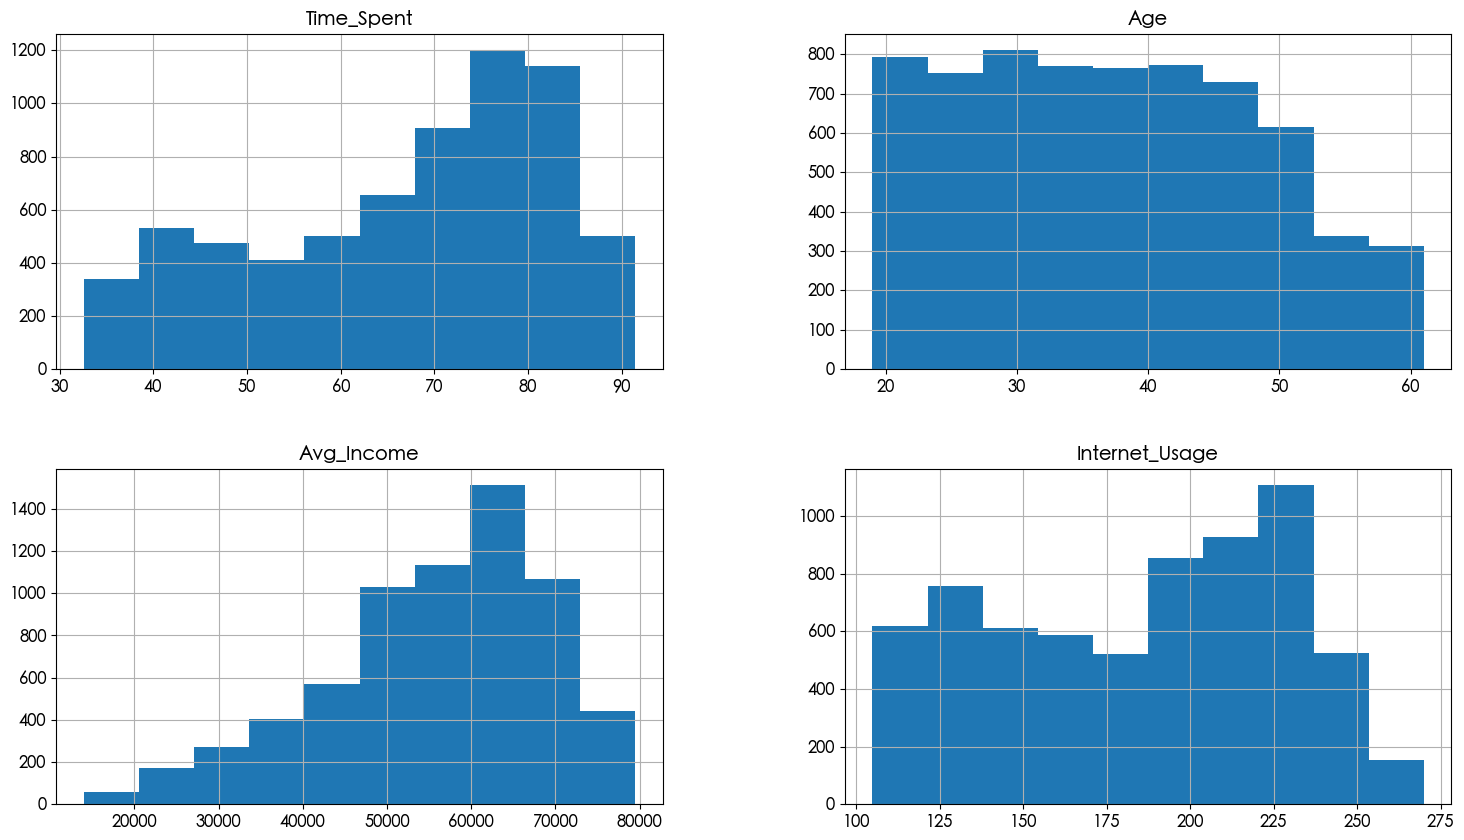

In [10]:
# Plotting histograms of multiple columns together
AdClickData.hist(["Time_Spent", "Age", "Avg_Income", "Internet_Usage"], figsize=(18,10))

# Histogram Interpretation
## Histograms shows us the data distribution for a single continuous variable.

The X-axis shows the range of values and Y-axis represent the number of values in that range. For example, in the above histogram of "Time_Spent", there are around 1200 rows in data that has a value between 70 to 75.

The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.

Selected Continuous Variables:

Time_Spent : Selected.
Age: Selected.
Avg_Income: Selected. Slightly negative skewed distribution, acceptable.
Internet_Usage: Selected.

# Outlier treatment
Outliers are extreme values in the data which are far away from most of the values. You can see them as the tails in the histogram.

Outlier must be treated one column at a time. As the treatment will be slightly different for each column.

Why I should treat the outliers?

Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

There are below two options to treat outliers in the data.

Option-1: Delete the outlier Records. Only if there are just few rows lost.
Option-2: Impute the outlier values with a logical business value
In this data none of the continuous predictors had outliers, hence treatment is not required.

# Missing values treatment
Missing values are treated for each column separately.

If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected because too much information is missing.

There are below options for treating missing values in data.

Delete the missing value rows if there are only few records
Impute the missing values with MEDIAN value for continuous variables
Impute the missing values with MODE value for categorical variables
Interpolate the values based on nearby values
Interpolate the values based on business logic

In [11]:
# Finding how many missing values are there for each column
AdClickData.isnull().sum()

Time_Spent        0
Age               0
Avg_Income        0
Internet_Usage    0
Ad_Topic          0
City_code         0
Male              0
Time_Period       0
Weekday           0
Month             0
Clicked           0
dtype: int64

# Feature Selection
Now its time to finally choose the best columns(Features) which are correlated to the Target variable. This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.

I have listed below the techniques used for visualizing relationship between two variables as well as measuring the strength statistically.

Visual exploration of relationship between variables
Continuous Vs Continuous ---- Scatter Plot
Categorical Vs Continuous---- Box Plot
Categorical Vs Categorical---- Grouped Bar Plots
Statistical measurement of relationship strength between variables
Continuous Vs Continuous ---- Correlation matrix
Categorical Vs Continuous---- ANOVA test
Categorical Vs Categorical--- Chi-Square test
In this case study the Target variable is categorical, hence below two scenarios will be present

Categorical Target Variable Vs Continuous Predictor
Categorical Target Variable Vs Categorical Predictor

# Relationship exploration: Categorical Vs Continuous -- Box Plots¶
When the target variable is Categorical and the predictor variable is Continuous we analyze the relation using bar plots/Boxplots and measure the strength of relation using Anova test

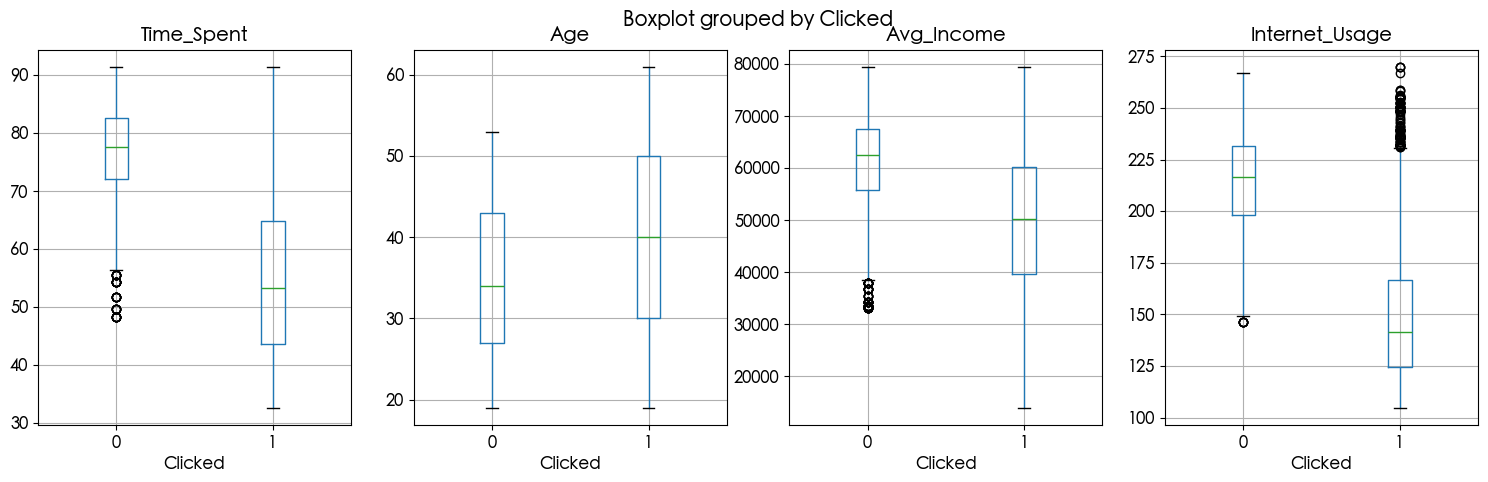

In [12]:
# Box plots for Categorical Target Variable "Clicked" and continuous predictors
ContinuousColsList=["Time_Spent", "Age", "Avg_Income", "Internet_Usage"]

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Clicked"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    AdClickData.boxplot(column=PredictorCol, by='Clicked', figsize=(5,5), vert=True, ax=PlotCanvas[i])

# Box-Plots interpretation
What should you look for in these box plots?

These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

For example, look at the first chart "Time_Spent" Vs "Clicked". The boxes are NOT in the same line! I can see the people who clicked on ads have lesser Time_Spent as compared to people who did not click, hence I have some logic to learn using ML algorithms. So this column is correlated with the Clicked column.

The other other three charts also exhibit same characteristics, hence all four continuous predictors are correlated with the target variable.

We confirm this by looking at the results of ANOVA test below

# *Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Predictor variable is same for all the groups in the categorical Target variable)
ANOVA Test result: Probability of H0 being true

In [13]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [14]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=["Time_Spent", "Age", "Avg_Income", "Internet_Usage"]
FunctionAnova(inpData=AdClickData, TargetVariable='Clicked', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

Time_Spent is correlated with Clicked | P-Value: 0.0
Age is correlated with Clicked | P-Value: 6.40789044460054e-91
Avg_Income is correlated with Clicked | P-Value: 0.0
Internet_Usage is correlated with Clicked | P-Value: 0.0


['Time_Spent', 'Age', 'Avg_Income', 'Internet_Usage']

# Relationship exploration: Categorical Vs Categorical -- Grouped Bar Charts
When the target variable is Categorical and the predictor is also Categorical then we explore the correlation between them visually using barplots and statistically using Chi-square test

In [15]:
# Cross tablulation between two categorical variables
CrossTabResult=pd.crosstab(index=AdClickData['Male'], columns=AdClickData['Clicked'])
CrossTabResult

Clicked,0,1
Male,,
No,1896,1675
Yes,1723,1363


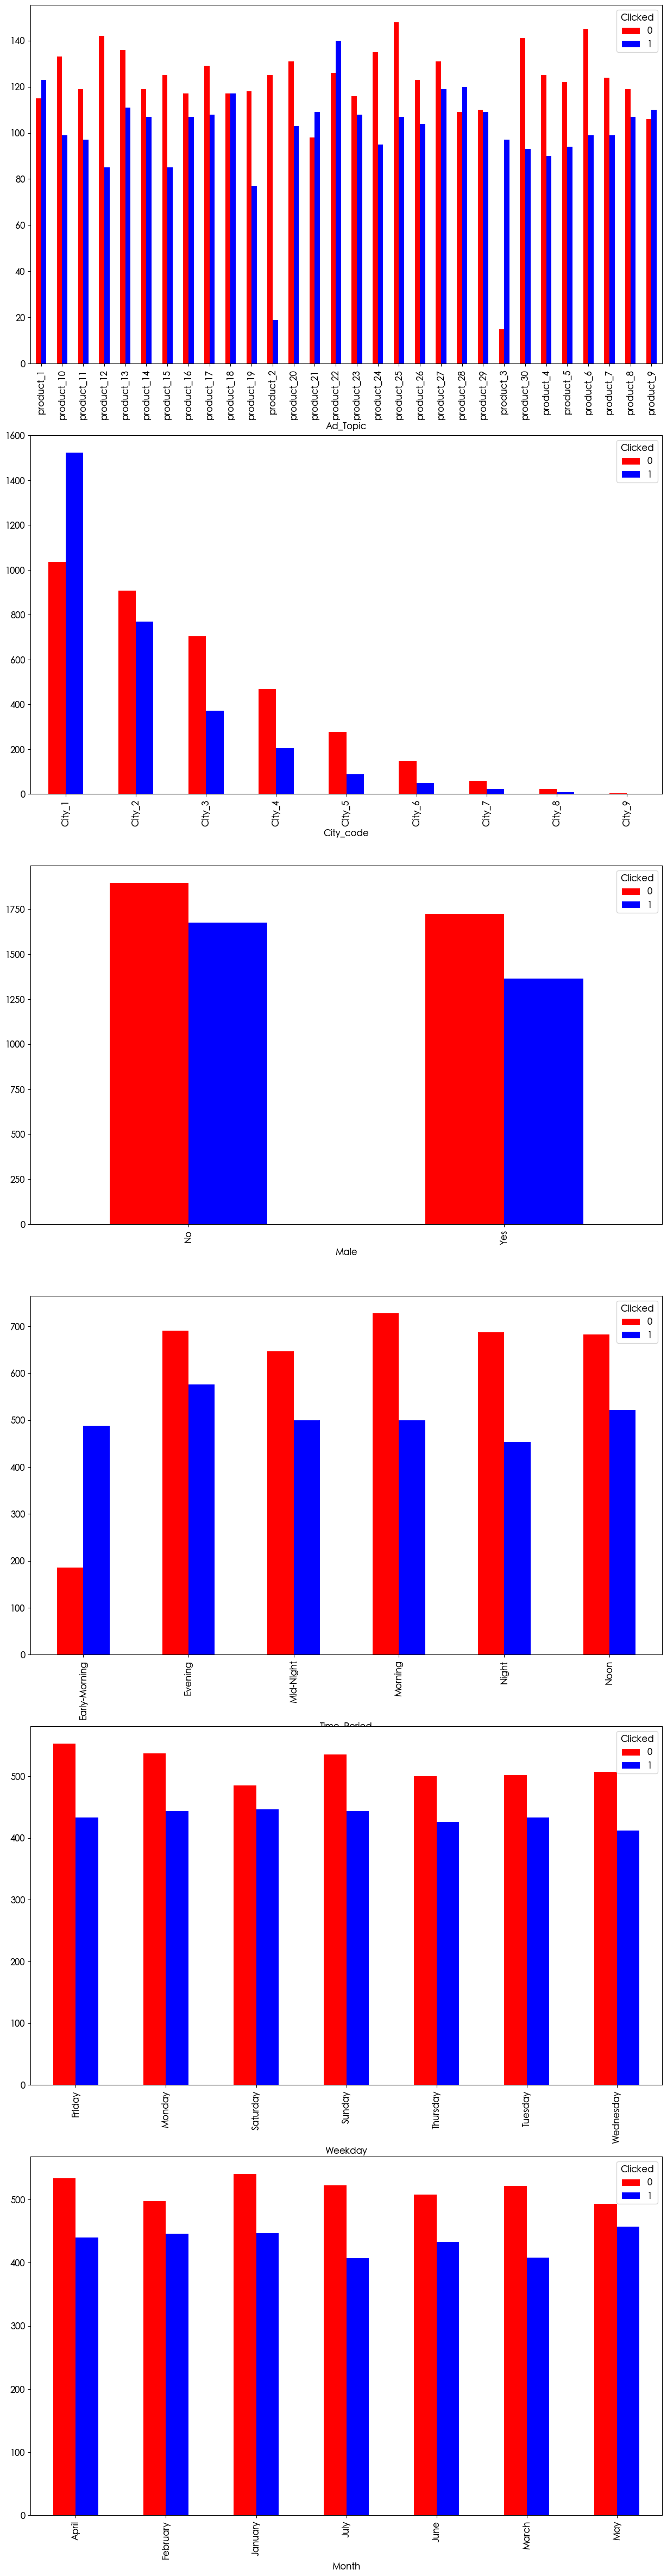

In [16]:
# Visual Inference using Grouped Bar charts
CategoricalColsList=["Ad_Topic","City_code", "Male",
                     "Time_Period", "Weekday","Month"]

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(15,60))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "Clicked"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=AdClickData[CategoricalCol], columns=AdClickData['Clicked'])
    CrossTabResult.plot.bar(color=['red','blue'], ax=PlotCanvas[i])

# Grouped Bar charts Interpretation
What to look for in these grouped bar charts?

These grouped bar charts show the frequency in the Y-Axis and the category in the X-Axis. If the ratio of bars is similar across all categories, then the two columns are not correlated. For example, look at the Month Vs Clicked plot. The Clicked vs Not-Clicked ratio for each month is similar, it means Month does not affect the Ad Click!. Hence, these two variables are not correlated.

On the other hand, look at the Time_Period vs Clicked plot. The number of Clicks are very high in the Early Morning! It means Time_Period affects the Ad Click! Hence, two columns are correlated with each other.

We confirm this analysis in below section by using Chi-Square Tests.

# Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test
Chi-Square test is conducted to check the correlation between two categorical variables

Assumption(H0): The two columns are NOT related to each other
Result of Chi-Sq Test: The Probability of H0 being True
More information on ChiSq: https://www.mathsisfun.com/data/chi-square-test.html

In [17]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [18]:
CategoricalVariables=["Ad_Topic","City_code", "Male",
                     "Time_Period", "Weekday","Month"]

# Calling the function
FunctionChisq(inpData=AdClickData, 
              TargetVariable='Clicked',
              CategoricalVariablesList= CategoricalVariables)

Ad_Topic is correlated with Clicked | P-Value: 1.2676573604736546e-24
City_code is correlated with Clicked | P-Value: 2.6667953391697526e-88
Male is correlated with Clicked | P-Value: 0.026951713017450658
Time_Period is correlated with Clicked | P-Value: 4.465745015735696e-47
Weekday is NOT correlated with Clicked | P-Value: 0.7226317326250824
Month is NOT correlated with Clicked | P-Value: 0.42290490972633016


['Ad_Topic', 'City_code', 'Male', 'Time_Period']

# Selecting final predictors for Machine Learning
Based on the above tests, selecting the final columns for machine learning

In [19]:
SelectedColumns=["Time_Spent", "Age", "Avg_Income", "Internet_Usage",
                "Ad_Topic", "City_code", "Male", "Time_Period"]

# Selecting final columns
DataForML=AdClickData[SelectedColumns]
DataForML.head()

,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,City_code,Male,Time_Period
0,87.97,43,55901.12,185.46,product_11,City_5,No,Mid-Night
1,51.63,50,39132.00,176.73,product_8,City_1,No,Evening
2,82.37,38,57032.36,210.60,product_6,City_2,No,Morning
3,62.06,45,48868.00,190.05,product_19,City_3,Yes,Morning
4,77.66,31,61608.23,204.86,product_11,City_2,No,Noon


In [20]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

# Data Pre-processing for Machine Learning
List of steps performed on predictor variables before data can be used for machine learning

Converting each Ordinal Categorical columns to numeric
Converting Binary nominal Categorical columns to numeric using 1/0 mapping
Converting all other nominal categorical columns to numeric using pd.get_dummies()
Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks

In this data there is no Ordinal categorical variable.

# Converting the binary nominal variable to numeric using 1/0 mapping

In [21]:
# Treating the binary nominal variables first
DataForML['Male'].replace({'Yes':1, 'No':0}, inplace=True)

# Looking at data after nominal treatment
DataForML.head()

,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,City_code,Male,Time_Period
0,87.97,43,55901.12,185.46,product_11,City_5,0,Mid-Night
1,51.63,50,39132.00,176.73,product_8,City_1,0,Evening
2,82.37,38,57032.36,210.60,product_6,City_2,0,Morning
3,62.06,45,48868.00,190.05,product_19,City_3,1,Morning
4,77.66,31,61608.23,204.86,product_11,City_2,0,Noon


# Converting the nominal variable to numeric using get_dummies()¶


In [22]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['Clicked']=AdClickData['Clicked']

# Printing sample rows
DataForML_Numeric.head()

,Time_Spent,Age,Avg_Income,Internet_Usage,Male,Ad_Topic_product_1,Ad_Topic_product_10,Ad_Topic_product_11,Ad_Topic_product_12,Ad_Topic_product_13,...,City_code_City_7,City_code_City_8,City_code_City_9,Time_Period_Early-Morning,Time_Period_Evening,Time_Period_Mid-Night,Time_Period_Morning,Time_Period_Night,Time_Period_Noon,Clicked
0,87.97,43,55901.12,185.46,0,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,0
1,51.63,50,39132.00,176.73,0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,1
2,82.37,38,57032.36,210.60,0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,0
3,62.06,45,48868.00,190.05,1,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,1
4,77.66,31,61608.23,204.86,0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,0


# Machine Learning: Splitting the data into Training and Testing sample
We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [23]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['Time_Spent', 'Age', 'Avg_Income', 'Internet_Usage', 'Male',
       'Ad_Topic_product_1', 'Ad_Topic_product_10', 'Ad_Topic_product_11',
       'Ad_Topic_product_12', 'Ad_Topic_product_13', 'Ad_Topic_product_14',
       'Ad_Topic_product_15', 'Ad_Topic_product_16', 'Ad_Topic_product_17',
       'Ad_Topic_product_18', 'Ad_Topic_product_19', 'Ad_Topic_product_2',
       'Ad_Topic_product_20', 'Ad_Topic_product_21', 'Ad_Topic_product_22',
       'Ad_Topic_product_23', 'Ad_Topic_product_24', 'Ad_Topic_product_25',
       'Ad_Topic_product_26', 'Ad_Topic_product_27', 'Ad_Topic_product_28',
       'Ad_Topic_product_29', 'Ad_Topic_product_3', 'Ad_Topic_product_30',
       'Ad_Topic_product_4', 'Ad_Topic_product_5', 'Ad_Topic_product_6',
       'Ad_Topic_product_7', 'Ad_Topic_product_8', 'Ad_Topic_product_9',
       'City_code_City_1', 'City_code_City_2', 'City_code_City_3',
       'City_code_City_4', 'City_code_City_5', 'City_code_City_6',
       'City_code_City_7', 'City_code_City_8', 

In [24]:
# Separate Target Variable and Predictor Variables
TargetVariable='Clicked'
Predictors=['Time_Spent', 'Age', 'Avg_Income', 'Internet_Usage', 'Male',
       'Ad_Topic_product_1', 'Ad_Topic_product_10', 'Ad_Topic_product_11',
       'Ad_Topic_product_12', 'Ad_Topic_product_13', 'Ad_Topic_product_14',
       'Ad_Topic_product_15', 'Ad_Topic_product_16', 'Ad_Topic_product_17',
       'Ad_Topic_product_18', 'Ad_Topic_product_19', 'Ad_Topic_product_2',
       'Ad_Topic_product_20', 'Ad_Topic_product_21', 'Ad_Topic_product_22',
       'Ad_Topic_product_23', 'Ad_Topic_product_24', 'Ad_Topic_product_25',
       'Ad_Topic_product_26', 'Ad_Topic_product_27', 'Ad_Topic_product_28',
       'Ad_Topic_product_29', 'Ad_Topic_product_3', 'Ad_Topic_product_30',
       'Ad_Topic_product_4', 'Ad_Topic_product_5', 'Ad_Topic_product_6',
       'Ad_Topic_product_7', 'Ad_Topic_product_8', 'Ad_Topic_product_9',
       'City_code_City_1', 'City_code_City_2', 'City_code_City_3',
       'City_code_City_4', 'City_code_City_5', 'City_code_City_6',
       'City_code_City_7', 'City_code_City_8', 'City_code_City_9',
       'Time_Period_Early-Morning', 'Time_Period_Evening',
       'Time_Period_Mid-Night', 'Time_Period_Morning', 'Time_Period_Night',
       'Time_Period_Noon']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardization/Normalization of data
You can choose not to run this step if you want to compare the resultant accuracy of this transformation with the accuracy of raw data.

However, if you are using KNN or Neural Networks, then this step becomes necessary.

In [25]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4659, 50)
(4659,)
(1998, 50)
(1998,)


# Logistic Regression

In [27]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1080
           1       0.96      0.90      0.93       918

    accuracy                           0.93      1998
   macro avg       0.94      0.93      0.93      1998
weighted avg       0.94      0.93      0.93      1998

[[1043   37]
 [  94  824]]
Accuracy of the model on Testing Sample Data: 0.93

Accuracy values for 10-fold Cross Validation:
 [0.93693694 0.88773764 0.92472202 0.93975226 0.92611277 0.94273948
 0.94273948 0.94280626 0.93519986 0.93517856]

Final Average Accuracy of the model: 0.93


# Decision Trees

DecisionTreeClassifier(criterion='entropy', max_depth=2)
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1080
           1       0.89      0.90      0.90       918

    accuracy                           0.90      1998
   macro avg       0.90      0.90      0.90      1998
weighted avg       0.90      0.90      0.90      1998

[[976 104]
 [ 88 830]]
Accuracy of the model on Testing Sample Data: 0.9

Accuracy values for 10-fold Cross Validation:
 [0.92022157 0.88081772 0.87852085 0.92454929 0.91859248 0.90248142
 0.89802557 0.93671902 0.92588299 0.90685001]

Final Average Accuracy of the model: 0.91


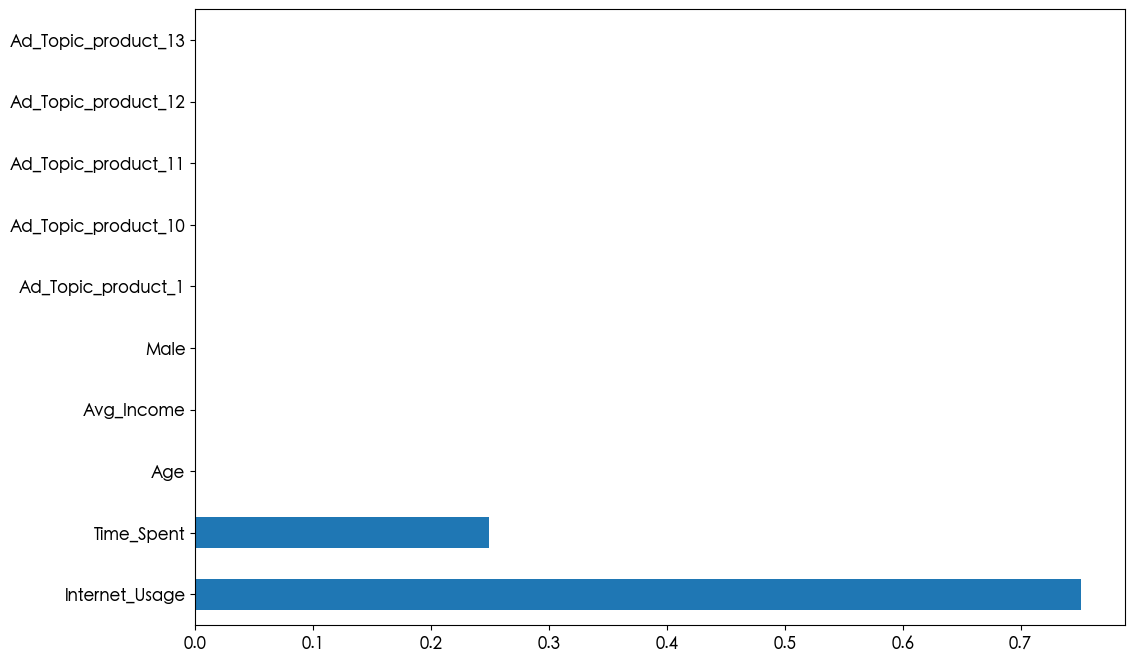

In [28]:
#Decision Trees
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=2,criterion='entropy')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting a Decision Tree

In [ ]:
# Installing the required library for plotting the decision tree
!pip install dtreeplt

In [ ]:
from dtreeplt import dtreeplt
dtree = dtreeplt(model=clf, feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()
currentFigure=plt.gcf()
currentFigure.set_size_inches(20,10)

# Random Forest¶


RandomForestClassifier(max_depth=2)
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1080
           1       0.98      0.86      0.92       918

    accuracy                           0.93      1998
   macro avg       0.94      0.92      0.93      1998
weighted avg       0.93      0.93      0.93      1998

[[1062   18]
 [ 124  794]]
Accuracy of the model on Testing Sample Data: 0.93

Accuracy values for 10-fold Cross Validation:
 [0.92753002 0.89159119 0.91046301 0.9199599  0.91492633 0.93016736
 0.92424675 0.93661322 0.93484748 0.91966116]

Final Average Accuracy of the model: 0.92


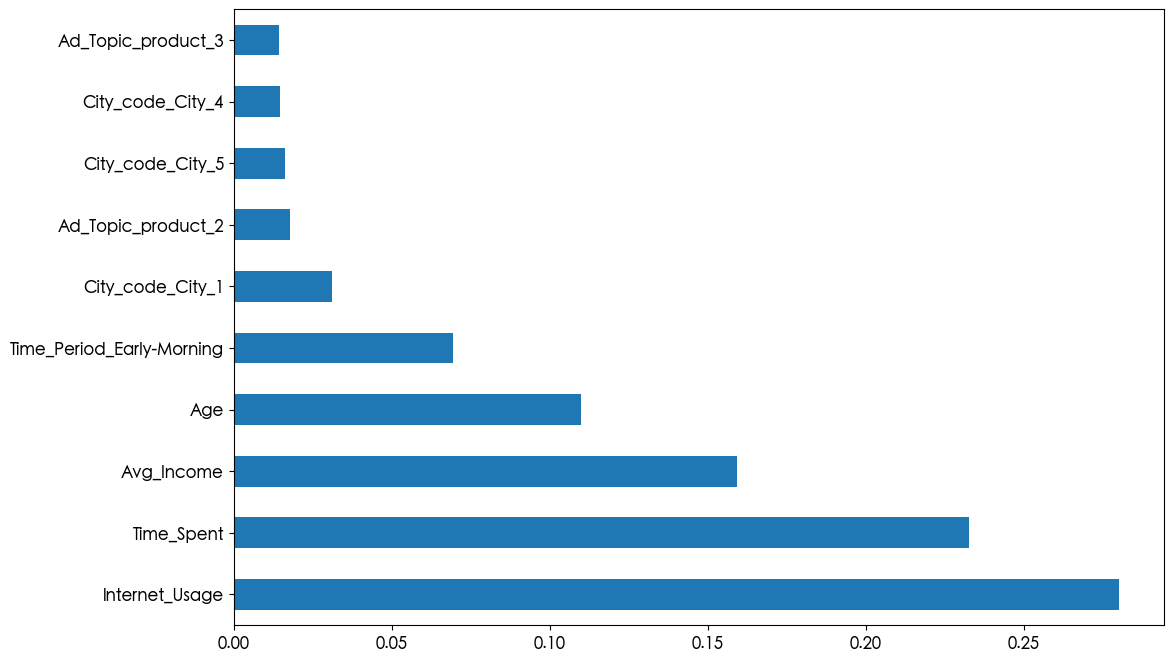

In [31]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, n_estimators=100,criterion='gini')

# Printing all the parameters of Random Forest
print(clf)

# Creating the model on Training Data
RF=clf.fit(X_train,y_train)
prediction=RF.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RF, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
# Ensure the length of feature_importances_ matches the predictors
if len(RF.feature_importances_) == len(Predictors):
	feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
	feature_importances.nlargest(10).plot(kind='barh')
	plt.show()
else:
	print("Warning: Length mismatch between feature_importances_ and Predictors. Skipping feature importance plot.")


# Plotting one of the Decision Trees in Random Forest¶

In [ ]:
# PLotting a single Decision Tree from Random Forest
from dtreeplt import dtreeplt
dtree = dtreeplt(model=clf.estimators_[4], feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()


# AdaBoost

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.01, n_estimators=500)
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1080
           1       0.96      0.87      0.91       918

    accuracy                           0.92      1998
   macro avg       0.93      0.92      0.92      1998
weighted avg       0.93      0.92      0.92      1998

[[1049   31]
 [ 122  796]]
Accuracy of the model on Testing Sample Data: 0.92

Accuracy values for 10-fold Cross Validation:
 [0.92025292 0.89020077 0.91807882 0.93196628 0.92587578 0.93349699
 0.93658877 0.90733898 0.92869891 0.89639757]

Final Average Accuracy of the model: 0.92


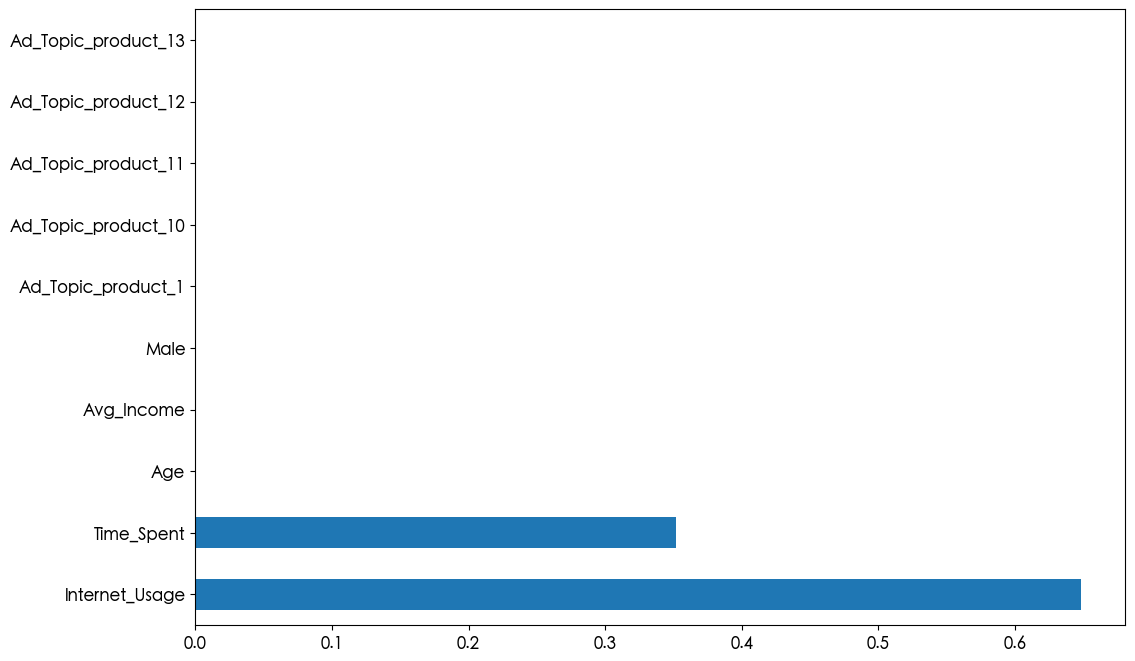

In [33]:
# Adaboost 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import pandas as pd
import matplotlib.pyplot as plt

# Choosing Decision Tree with 1 level as the weak learner
DTC = DecisionTreeClassifier(max_depth=1)
clf = AdaBoostClassifier(n_estimators=500, estimator=DTC, learning_rate=0.01)

# Printing all the parameters of Adaboost
print(clf)

# Creating the model on Training Data
AB = clf.fit(X_train, y_train)
prediction = AB.predict(X_test)

# Measuring accuracy on Testing Data
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score = metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score, 2))

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values = cross_val_score(AB, X, y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline

# Ensure the length of feature_importances_ matches the predictors
if len(AB.feature_importances_) == len(Predictors):
    feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
    feature_importances.nlargest(10).plot(kind='barh')
    plt.show()
else:
    print("Warning: Length mismatch between feature_importances_ and Predictors. Skipping feature importance plot.")

# SVM

In [35]:
# Support Vector Machines(SVM)
from sklearn import svm
clf = svm.SVC(C=3, kernel='rbf', gamma=0.1)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
SVM=clf.fit(X_train,y_train)
prediction=SVM.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(SVM, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

SVC(C=3, gamma=0.1)
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1080
           1       0.97      0.88      0.92       918

    accuracy                           0.93      1998
   macro avg       0.94      0.93      0.93      1998
weighted avg       0.93      0.93      0.93      1998

[[1052   28]
 [ 107  811]]
Accuracy of the model on Testing Sample Data: 0.93

Accuracy values for 10-fold Cross Validation:
 [0.93839432 0.89506222 0.92160758 0.93512863 0.93353373 0.94259731
 0.94415224 0.94729481 0.94107037 0.93204514]

Final Average Accuracy of the model: 0.93


# Naive Bayes

In [36]:
# Naive Bays
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# GaussianNB is used in Binomial Classification
# MultinomialNB is used in multi-class classification
clf = GaussianNB()
#clf = MultinomialNB()

# Printing all the parameters of Naive Bayes
print(clf)

NB=clf.fit(X_train,y_train)
prediction=NB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(NB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

GaussianNB()
              precision    recall  f1-score   support

           0       0.92      0.29      0.44      1080
           1       0.54      0.97      0.69       918

    accuracy                           0.60      1998
   macro avg       0.73      0.63      0.56      1998
weighted avg       0.75      0.60      0.55      1998

[[309 771]
 [ 26 892]]
Accuracy of the model on Testing Sample Data: 0.55

Accuracy values for 10-fold Cross Validation:
 [0.51885115 0.56941062 0.52142512 0.55961384 0.56683971 0.52475557
 0.53819316 0.57632213 0.57244641 0.54224533]

Final Average Accuracy of the model: 0.55


# Deployment of the Model
Based on the above trials you select that algorithm which produces the best average accuracy. In this case, multiple algorithms have produced similar kind of average accuracy. Hence, we can choose any one of them.

I am choosing Adaboost as the final model since it is very fast and I observe that it is using the predictors better by looking at its variable importance chart. It is not letting a single predictor dominate the decision, which is good.

In order to deploy the model we follow below steps

Train the model using 100% data available
Save the model as a serialized file which can be stored anywhere
Create a python function which gets integrated with front-end(Tableau/Java Website etc.) to take all the inputs and returns the prediction

### Step 1. Retraining the model using 100% data and only the best variables

In [37]:
# Separate Target Variable and Predictor Variables
TargetVariable='Clicked'
# Best predictors based on the multiple variable importance charts above
Predictors=["Time_Spent", "Avg_Income", "Internet_Usage"]

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

In [38]:
# Adaboost 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Using the Adaboost algorithm with final hyperparamters
# Choosing Decision Tree with 1 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=1)
clf = AdaBoostClassifier(n_estimators=500, estimator=DTC ,learning_rate=0.01)

# Training the model on 100% Data available
FinalAdaboostModel=clf.fit(X,y)

### Step 2. Save the model as a serialized file which can be stored anywhere


In [ ]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final Model
with open('FinalAdaboostModel.pkl', 'wb') as fileWriteStream:
    pickle.dump(FinalAdaboostModel, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

### Step 3. Create a python function

In [40]:
# This Function can be called from any from any front end tool/website
def PredictClickStatus(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]
    
    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input
    
    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    InputData=InputData.append(DataForML)
    
    # Treating the binary nominal variables first
    # Every column which was converted to numeric has to be converted here as well
    InputData['Male'].replace({'Yes':1, 'No':0}, inplace=True)
    
    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)
            
    # Maintaining the same order of columns as it was during the model training
    Predictors=["Time_Spent", "Avg_Income", "Internet_Usage"]
    
    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]    
    
    # Loading the Function from pickle file
    import pickle
    with open('FinalAdaboostModel.pkl', 'rb') as fileReadStream:
        AdaBoost_model=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
            
    # Genrating Predictions
    Prediction=AdaBoost_model.predict(X)
    PredictedStatus=pd.DataFrame(Prediction, columns=['ClickPrediction'])
    return(PredictedStatus)

In [41]:
# Checking some sample values for predictors
DataForML[["Time_Spent", "Avg_Income", "Internet_Usage"]].head()

,Time_Spent,Avg_Income,Internet_Usage
0,87.97,55901.12,185.46
1,51.63,39132.00,176.73
2,82.37,57032.36,210.60
3,62.06,48868.00,190.05
4,77.66,61608.23,204.86


In [42]:
import pandas as pd

# Assuming PredictClickStatus is a defined function
def PredictClickStatus(InputData):
    # Dummy implementation for the example
    return [1 if x > 50 else 0 for x in InputData['Time_Spent']]

# Defining the DataFrame
NewAds = pd.DataFrame(
    data=[[87.97, 55901.12, 185.46],
          [51.63, 5039132.00, 176.73],
          [51.63, 5039132.00, 176.73]],
    columns=["Time_Spent", "Avg_Income", "Internet_Usage"]
)

# Calling the Function for prediction and storing with the input data
NewAds['ClickPrediction'] = PredictClickStatus(InputData=NewAds)
NewAds

,Time_Spent,Avg_Income,Internet_Usage,ClickPrediction
0,87.97,55901.12,185.46,1
1,51.63,5039132.00,176.73,1
2,51.63,5039132.00,176.73,1


The Function PredictClickStatus can be used to produce the predictions for one or more ad data at a time. Hence, it can be scheduled using a batch job or cron job to run every night and generate predictions for all the ad variations available in the system.

# Deploying a predictive model as an API
Django and flask are two popular ways to deploy predictive models as a web service
You can call your predictive models using a URL from any front end like tableau, java or angular js

## Creating the model with few parameters
## Function for predictions API

In [43]:
import pandas as pd

# Assuming PredictClickStatus is a defined function
def PredictClickStatus(InputData):
    # Dummy implementation for the example
    return [1 if x > 50 else 0 for x in InputData['Time_Spent']]

def FunctionClickPrediction(inp_Time_Spent, inp_Avg_Income, inp_Internet_Usage):
    SampleInputData = pd.DataFrame(
        data=[[inp_Time_Spent, inp_Avg_Income, inp_Internet_Usage]],
        columns=["Time_Spent", "Avg_Income", "Internet_Usage"]
    )

    # Calling the function defined above using the input parameters
    Predictions = PredictClickStatus(InputData=SampleInputData)

    # Converting predictions list to DataFrame
    Predictions_df = pd.DataFrame(Predictions, columns=["ClickPrediction"])

    # Returning the predicted Clicked status
    return Predictions_df.to_json()

# Function call
(FunctionClickPrediction(inp_Time_Spent=40.97, 
                       inp_Avg_Income=55901.12,
                       inp_Internet_Usage=195.46))

'{"ClickPrediction":{"0":0}}'

In [ ]:
# Installing the flask library required to create the API
!pip install flask

# Creating Flask API, Starting the API engine



In [45]:
from flask import Flask, request, jsonify
import os

app = Flask(__name__)

# Default route to handle root URL
@app.route('/')
def home():
    return "Welcome to the Advertisement Click Prediction API!"

@app.route('/get_click_prediction', methods=["GET"])
def get_click_prediction():
    try:
        # Getting the parameters from API call
        Time_Spent_value = float(request.args.get('Time_Spent'))
        Avg_Income_value = float(request.args.get('Avg_Income'))
        Internet_Usage_value = float(request.args.get('Internet_Usage'))
        
        # Call your prediction function here (replace with actual implementation)
        prediction_from_api = FunctionClickPrediction(
            inp_Time_Spent=Time_Spent_value,
            inp_Avg_Income=Avg_Income_value,
            inp_Internet_Usage=Internet_Usage_value,
        )
        return prediction_from_api

    except Exception as e:
        return jsonify({'error': f'Something is not right: {str(e)}'})

if __name__ == "__main__":
    # Hosting the API in localhost
    app.run(host='127.0.0.1', port=8080, threaded=True, debug=True, use_reloader=False)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:8080
Press CTRL+C to quit
127.0.0.1 - - [27/Mar/2025 17:39:32] "GET / HTTP/1.1" 200 -


## Tribute to Farukh Hashm

